In [7]:
from searvey._chs_api import get_chs_stations

all_stations = get_chs_stations()
all_stations["timeSeries"]
#filter to show only rows that have operating column as True
# df = all_stations
# filtered_df = df[df["operating"].str.contains("True")]
# filtered_df

0       [{'id': '5cebf1e33d0f4a073c4bc17b', 'code': 'w...
1       [{'id': '5dd306f0e0fdc4b9b4bfa1ac', 'code': 'w...
2       [{'id': '61e0855efb8c1f4c0b09deb8', 'code': 'w...
3       [{'id': '5cebf1e23d0f4a073c4bc087', 'code': 'w...
4       [{'id': '5cebf1e23d0f4a073c4bc006', 'code': 'w...
                              ...                        
1346                                                   []
1347    [{'id': '5cebf1df3d0f4a073c4bbc4f', 'code': 'w...
1348    [{'id': '5cebf1e13d0f4a073c4bbf0a', 'code': 'w...
1349    [{'id': '5cebf1e33d0f4a073c4bc2a6', 'code': 'w...
1350                                                   []
Name: timeSeries, Length: 1351, dtype: object

In [8]:
import geopandas as gpd
import hvplot.pandas
import pandas as pd
def plot_map(data, title):
    # Plot the world map
    world_plot = data.hvplot(geo=True, tiles=True, hover_cols=["id","officialName", "latitude", "longitude"], title=title)
    return world_plot.opts(width=800, height=500)

plot_map(all_stations, 'CHS Stations')

/home/abdu/Documents/canadian/searvey/.venv/lib/python3.10/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (id,officialName,latitude,longitude)

In [7]:
from shapely.geometry import box
# Define a rectangular region
region = box(-150, 40, -110, 60)  # Longitude range, Latitude range

# Get stations within the region
east_coast_stations = get_chs_stations(region=region)
plot_map(east_coast_stations, 'CHS Stations on the East Coast of Canada')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (id,officialName,latitude,longitude)

To get data from a specific station you need to input one of the codes below:
wlo - Observed water level
wlf or wlf-spine - predicted water levels (at operational stations only)
wlp - Predicted water levels
wlp-hilo High and low sea predictions (Tide tables)

Note: Some stations may not support a specific code/type of data

In [3]:
# Define start and end dates for data retrieval
start_date = "2023-01-08"
end_date = "2023-01-10"
from searvey._chs_api import fetch_chs_station
# Get data for selected stations (mode = 'stdmet' for standard meteorological data)
data_df = fetch_chs_station(
    station_id="5cebf1e33d0f4a073c4bc23e",
    time_series_code="wlo",
    start_date="2023-01-08",
    end_date="2023-01-10",
)

data_df

  0%|          | 0/1 [00:00<?, ?it/s]

,eventDate,qcFlagCode,value,timeSeriesId,reviewed
0,2023-01-08T00:00:00Z,1,1.578,5cebf1e33d0f4a073c4bc239,True
1,2023-01-08T00:01:00Z,1,1.580,5cebf1e33d0f4a073c4bc239,True
2,2023-01-08T00:02:00Z,1,1.581,5cebf1e33d0f4a073c4bc239,True
3,2023-01-08T00:03:00Z,1,1.581,5cebf1e33d0f4a073c4bc239,True
4,2023-01-08T00:04:00Z,1,1.581,5cebf1e33d0f4a073c4bc239,True
...,...,...,...,...,...
2876,2023-01-09T23:56:00Z,1,1.503,5cebf1e33d0f4a073c4bc239,True
2877,2023-01-09T23:57:00Z,1,1.502,5cebf1e33d0f4a073c4bc239,True
2878,2023-01-09T23:58:00Z,1,1.501,5cebf1e33d0f4a073c4bc239,True
2879,2023-01-09T23:59:00Z,1,1.503,5cebf1e33d0f4a073c4bc239,True


<Axes: >

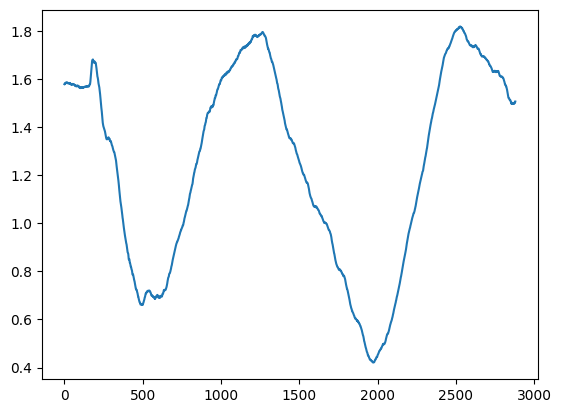

In [6]:
data_df["value"].plot()

In [5]:
def plot(data_df):
    return data_df["value"].hvplot(title="CHS values", xlabel="Index", ylabel="Value")

plot(data_df)


:Curve   [index]   (value)